In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
%matplotlib inline

print(tf.__version__)

0.12.1


In [4]:
if dir().count('sess'):
    sess.close()
sess = tf.InteractiveSession()
vocabulary_size = 10
embedding_size = 2

W_input = tf.Variable(tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
sess.run(W_input.initializer)

W_input.eval()

array([[-0.39638567, -0.14599776],
       [ 0.9013021 , -0.2407124 ],
       [ 0.57776117,  0.27585888],
       [-0.12349987,  0.16445065],
       [ 0.94248819,  0.40537047],
       [ 0.72268963, -0.55309057],
       [-0.44066286,  0.10780501],
       [-0.99219823,  0.07880068],
       [-0.51341844, -0.56764507],
       [ 0.73398495, -0.91276121]], dtype=float32)

In [5]:
input_word = 3
output_word = 4

print(W_input.eval())
tf.nn.embedding_lookup(W_input, input_word).eval()

[[-0.39638567 -0.14599776]
 [ 0.9013021  -0.2407124 ]
 [ 0.57776117  0.27585888]
 [-0.12349987  0.16445065]
 [ 0.94248819  0.40537047]
 [ 0.72268963 -0.55309057]
 [-0.44066286  0.10780501]
 [-0.99219823  0.07880068]
 [-0.51341844 -0.56764507]
 [ 0.73398495 -0.91276121]]


array([-0.12349987,  0.16445065], dtype=float32)

In [6]:
W_output = tf.Variable(tf.random_uniform([embedding_size, vocabulary_size], -1.0, 1.0))
sess.run(W_output.initializer)
scores = tf.matmul(tf.nn.embedding_lookup(W_input, [input_word]), W_output).eval()
scores

array([[ 0.05107924,  0.10061752, -0.0403597 ,  0.03184319, -0.06993999,
         0.24070053,  0.14932929, -0.00373278,  0.18020698,  0.03997286]], dtype=float32)

In [7]:
tf.transpose(tf.nn.softmax(scores)).eval()

array([[ 0.09788708],
       [ 0.10285836],
       [ 0.08933342],
       [ 0.09602212],
       [ 0.08672962],
       [ 0.1183251 ],
       [ 0.10799281],
       [ 0.09266609],
       [ 0.1113794 ],
       [ 0.09680593]], dtype=float32)

In [8]:
tf.nn.sparse_softmax_cross_entropy?

Object `tf.nn.sparse_softmax_cross_entropy` not found.


In [9]:
!wget http://www.cs.cornell.edu/~shuochen/lme/dataset.tar.gz
! tar -xvf dataset.tar.gz

--2017-01-27 14:59:48--  http://www.cs.cornell.edu/~shuochen/lme/dataset.tar.gz
Resolving www.cs.cornell.edu... 132.236.207.20
Connecting to www.cs.cornell.edu|132.236.207.20|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15344424 (15M) [application/x-gzip]
Saving to: 'dataset.tar.gz.1'

dataset.tar.gz.1    100%[===================>]  14.63M  4.58MB/s    in 3.2s    

2017-01-27 14:59:52 (4.58 MB/s) - 'dataset.tar.gz.1' saved [15344424/15344424]

x dataset/
x dataset/._.DS_Store
x dataset/.DS_Store
x dataset/README
x dataset/yes_big/
x dataset/yes_complete/
x dataset/yes_small/
x dataset/yes_small/song_hash.txt
x dataset/yes_small/tag_hash.txt
x dataset/yes_small/tags.txt
x dataset/yes_small/test.txt
x dataset/yes_small/train.txt
x dataset/yes_complete/song_hash.txt
x dataset/yes_complete/tag_hash.txt
x dataset/yes_complete/tags.txt
x dataset/yes_complete/test.txt
x dataset/yes_complete/train.txt
x dataset/yes_big/song_hash.txt
x dataset/yes_big/tag_hash.txt
x 

In [10]:
! head -5 dataset/yes_small/train.txt | cut -c 1-50

17430147 17277121 17767569 17352501 17567841 17650
19 456 22 82 120 854 597 20 160 76 415 493 81 29 1
0 1 2 3 4 5 6 7 8 
9 10 11 
12 13 14 15 


* .assign
* .apply
* .iloc

In [11]:
FIRST_FAULTY_PLAYLIST = 2
playlists = pd.read_csv('dataset/yes_small/train.txt', header=None, names=['songs'])\
    .assign(songs=lambda df: df.songs.str.split(' ')\
    .apply(lambda ids: list(map(int, filter(None, ids)))))\
    .iloc[FIRST_FAULTY_PLAYLIST:,:]

print('{} playlists for a total of {} songs'.format(playlists.shape[0], playlists.songs.apply(len).sum()))
playlists.head()
playlists.head()

41480 playlists for a total of 175911 songs


,songs
2,"[0, 1, 2, 3, 4, 5, 6, 7, 8]"
3,"[9, 10, 11]"
4,"[12, 13, 14, 15]"
5,"[16, 17, 18]"
6,[19]


* .DataFrame.from_records
* chain

In [12]:
from itertools import chain

playlist_songs = pd.DataFrame.from_records(
    data=chain.from_iterable([(playlist_id, position, song_id) for position, song_id in enumerate(song_ids)] for playlist_id, (song_ids,) in playlists.iterrows()),
    columns=['playlist_id', 'position', 'song_id'])

print(playlist_songs.shape)
playlist_songs.head()

(175911, 3)


,playlist_id,position,song_id
0,2,0,0
1,2,1,1
2,2,2,2
3,2,3,3
4,2,4,4


In [13]:
test_playlists = pd.read_csv('dataset/yes_small/test.txt', header=None, names=['songs'])\
    .assign(songs=lambda df: df.songs.str.split(' ').apply(lambda ids: list(map(int, filter(None, ids)))))\
    .iloc[FIRST_FAULTY_PLAYLIST:,:]

print('{} playlists for a total of {} songs'.format(test_playlists.shape[0], test_playlists.songs.apply(len).sum()))
test_playlists.head()

389728 playlists for a total of 1581007 songs


,songs
2,"[3, 30, 38, 11, 39, 22, 40]"
3,"[12, 41, 42]"
4,"[43, 36]"
5,[44]
6,[4]


* cat.codes?
* set_index

In [14]:
songs = pd.read_csv('dataset/yes_small/song_hash.txt', sep='\t', names=['song_id', 'title', 'artist'])\
    .set_index('song_id', drop=False)\
    .assign(artist_id=lambda df: df.artist.astype('category').cat.codes)

print(songs.shape)
songs.head(5)

(3168, 4)


,song_id,title,artist,artist_id
song_id,,,,
0,0,Gucci Time (w\/ Swizz Beatz),Gucci Mane,474
1,1,Aston Martin Music (w\/ Drake & Chrisette Mich...,Rick Ross,960
2,2,Get Back Up (w\/ Chris Brown),T.I.,1098
3,3,Hot Toddy (w\/ Jay-Z & Ester Dean),Usher,1264
4,4,Whip My Hair,Willow,1304


### Num songs by artist

* groupby

In [15]:
artists = songs.groupby('artist_id').first()[['artist']].reset_index()

artist_songs_played = songs.artist.loc[playlist_songs.song_id].to_frame('artist')\
    .groupby('artist').size()\
    .sort_values(ascending=False).to_frame('n_songs_played')

artists = pd.merge(artists, artist_songs_played.reset_index(), on='artist')
artists.head()

,artist_id,artist,n_songs_played
0,0,-,93
1,1,.38 Special,47
2,2,10 Years,152
3,3,2Pac,146
4,4,3 Doors Down,274


* .merge
* plt.hist, plt.xscale

,playlist_id,position,song_id,title,artist,artist_id
0,4,0,12,All I Wants Is You (w\/ J Cole),Miguel,797
1,4,1,13,Champagne Life,Ne-Yo,832
2,4,2,14,Find Your Love,Drake,341
3,4,3,15,Your Love,Nicki Minaj,844


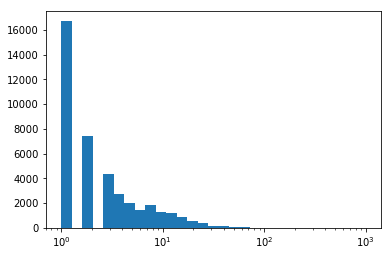

In [16]:
plt.hist(playlist_songs.groupby('playlist_id').size(), bins=np.logspace(0, 3, 30))
plt.xscale('log')

pd.merge(
    playlist_songs.query('playlist_id == 4'),
    songs,
    on='song_id')

In [17]:
songs.song_id.describe()

count    3168.000000
mean     1583.500000
std       914.667153
min         0.000000
25%       791.750000
50%      1583.500000
75%      2375.250000
max      3167.000000
Name: song_id, dtype: float64

In [18]:

playlist_songs.song_id.describe()

count    175911.000000
mean       1532.231151
std        1016.879762
min           0.000000
25%         541.000000
50%        1579.000000
75%        2505.000000
max        3167.000000
Name: song_id, dtype: float64

## Skip-gram generator
Generating all pairs of co-played words (ie artists) from the same context (ie playlist), without taking into account the order.

* permutations, chain

In [19]:
from itertools import permutations, chain

song_ids = playlist_songs.query('playlist_id == 3').song_id.values

def artist_skip_grams(song_ids):
    song_artist_ids = songs.artist_id.loc[song_ids].values
    return [(a1, a2) for a1, a2 in permutations(song_artist_ids, 2) if a1 != a2]

print(songs.artist_id.loc[song_ids])
print(artist_skip_grams(song_ids))

song_id
9      965
10     394
11    1264
Name: artist_id, dtype: int16
[(965, 394), (965, 1264), (394, 965), (394, 1264), (1264, 965), (1264, 394)]


In [20]:
N_SONGS = songs.song_id.max() + 1

* chain.from_iterable map
* repeat
* islice

In [21]:
from itertools import islice, repeat

class PlaylistToArtistSkipGrams:

    def __init__(self, playlists=playlists, loops=1):
        all_artist_skip_grams = chain.from_iterable(map(artist_skip_grams, playlists.songs.values))
        self.all_artist_skip_grams_iterable = chain.from_iterable(repeat(all_artist_skip_grams, loops))
        
    def next_batch(self, batch_size):
        next_skip_grams = list(islice(self.all_artist_skip_grams_iterable, batch_size))
        return np.array(next_skip_grams, dtype=np.int32) 

skipGramGenerator = PlaylistToArtistSkipGrams()

In [50]:
train_data = PlaylistToArtistSkipGrams(playlists=playlists, loops=1)
# print(input_data.next_batch(10))

## Skip-gram model in Tensorflow

The implementation in tutorial uses some high-level optimised function (namely the tf.nn.nce_loss) that makes the code less didactic without having any impact for the size of our dataset.
Therefore it's a better exercise to:
* Define input_embeddings = tf.Variable(tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0)) and the symmetrical hidden_embeddings (instead of nce_weights) as in the schema below
* Drop the nce_biases altogether
* Multiply the embed tensor with the hidden_embeddings to calculate a (N_SAMPLES x N_OUTPUT_SONGS) logits tensor (hint: use tf.matmul and tf.transpose)
* Feed logits and train_labels into tf.nn.sparse_softmax_cross_entropy_with_logits as we did for the iris classification
* (Or alternatively compute manually the softmax loss)

In [23]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://adriancolyer.files.wordpress.com/2016/04/word2vec-skip-gram.png?w=1132", width=400, height=200)

In [24]:
songs.shape[0]

3168

In [25]:
import math 
vocabulary_size = songs.shape[0]
embedding_size = 50

embeddings = tf.Variable(tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))

nce_weights = tf.Variable(
  tf.truncated_normal([vocabulary_size, embedding_size],
                      stddev=1.0 / math.sqrt(embedding_size)))
nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

In [26]:
batch_size = 100
# Placeholders for inputs
train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])

In [27]:
embed = tf.nn.embedding_lookup(embeddings, train_inputs)

In [28]:
num_sampled = 50
# Compute the NCE loss, using a sample of the negative labels each time.
loss = tf.reduce_mean(
  tf.nn.nce_loss(nce_weights, nce_biases, embed, train_labels,
                 num_sampled, vocabulary_size))

In [29]:
# We use the SGD optimizer.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1.0).minimize(loss)

In [33]:
for inputs, labels in a.next_batch(batch_size):
    feed_dict = {train_inputs: inputs, train_labels: labels}
    _, cur_loss = sess.run([optimizer, loss], feed_dict=feed_dict)

NameError: name 'a' is not defined

Next session: 
* Implement word2vec (as FFN) in Keras
* using the same data

In [41]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Reshape, Dense, Activation

model = Sequential()

In [53]:
vocabulary_size, embedding_size

(3168, 50)

In [42]:
model.add(Embedding(vocabulary_size, embedding_size, input_length=1))
# (None, 3168) but got array with shape (2, 1)

In [43]:
model.add(Reshape((embedding_size,)))

In [46]:
model.add(Dense(output_dim=vocabulary_size, input_dim=embedding_size))
model.add(Activation("softmax"))

In [47]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [51]:
batch_size = 10

current_batch = train_data.next_batch(batch_size)
input_data = current_batch[0]
output_data = current_batch[1]

model.train_on_batch(input_data, output_data)

ValueError: Error when checking model target: expected activation_2 to have shape (None, 3168) but got array with shape (2, 1)